# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
# YOUR CODE HERE
url = "https://api.openweathermap.org/data/2.5/weather?" 
units = "metric"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    # YOUR CODE HERE
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}" 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        # YOUR CODE HERE
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"] # YOUR CODE HERE
        city_lon = city_weather["coord"]["lon"] # YOUR CODE HERE
        city_max_temp = city_weather["main"]["temp_max"] # YOUR CODE HERE
        city_humidity = city_weather["main"]["humidity"] # YOUR CODE HERE
        city_clouds = city_weather["clouds"]["all"] # YOUR CODE HERE
        city_wind = city_weather["wind"]["speed"] # YOUR CODE HERE
        city_country = city_weather["sys"]["country"] # YOUR CODE HERE
        city_date = city_weather["dt"] # YOUR CODE HERE 

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lon, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | selkirk
Processing Record 3 of Set 1 | sisimiut
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | kidal
Processing Record 6 of Set 1 | bengkulu
Processing Record 7 of Set 1 | vorgashor
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | warman
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | timimoun
Processing Record 12 of Set 1 | shahrak
Processing Record 13 of Set 1 | santana
Processing Record 14 of Set 1 | margaret river
Processing Record 15 of Set 1 | utrik
Processing Record 16 of Set 1 | taiohae
City not found. Skipping...
Processing Record 17 of Set 1 | reyes
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | vila franca do campo
Processing Record 20 of Set 1 | joshimath
Processing Record 21 of Set 1 | bobo-dioulasso
Processing Record 22 of Set

Processing Record 41 of Set 4 | pulandian
Processing Record 42 of Set 4 | uyar
Processing Record 43 of Set 4 | oroqen zizhiqi
Processing Record 44 of Set 4 | kavaratti
Processing Record 45 of Set 4 | kingston
Processing Record 46 of Set 4 | port lincoln
Processing Record 47 of Set 4 | brisas de zicatela
Processing Record 48 of Set 4 | soufriere
Processing Record 49 of Set 4 | tadine
Processing Record 0 of Set 5 | alotau
City not found. Skipping...
Processing Record 1 of Set 5 | alice springs
Processing Record 2 of Set 5 | jonquiere
Processing Record 3 of Set 5 | san juan de miraflores
Processing Record 4 of Set 5 | atafu village
Processing Record 5 of Set 5 | qal'at bishah
City not found. Skipping...
Processing Record 6 of Set 5 | praia da vitoria
Processing Record 7 of Set 5 | antigonish
Processing Record 8 of Set 5 | longyearbyen
Processing Record 9 of Set 5 | colonia
Processing Record 10 of Set 5 | kismayo
Processing Record 11 of Set 5 | rudnichnyy
Processing Record 12 of Set 5 | al

Processing Record 31 of Set 8 | hami
Processing Record 32 of Set 8 | toliara
Processing Record 33 of Set 8 | grand falls-windsor
Processing Record 34 of Set 8 | vanino
Processing Record 35 of Set 8 | ghanzi
Processing Record 36 of Set 8 | vernon
Processing Record 37 of Set 8 | beloyarskiy
Processing Record 38 of Set 8 | itaituba
Processing Record 39 of Set 8 | baotou
Processing Record 40 of Set 8 | viedma
Processing Record 41 of Set 8 | yaren
Processing Record 42 of Set 8 | revda
Processing Record 43 of Set 8 | tirumullaivasal
Processing Record 44 of Set 8 | talnakh
Processing Record 45 of Set 8 | talitsa
Processing Record 46 of Set 8 | ak'ordat
Processing Record 47 of Set 8 | gadzhiyevo
Processing Record 48 of Set 8 | sabang
Processing Record 49 of Set 8 | pisco
Processing Record 0 of Set 9 | cabo san lucas
Processing Record 1 of Set 9 | petropavlovsk-kamchatsky
Processing Record 2 of Set 9 | karwar
Processing Record 3 of Set 9 | cidreira
Processing Record 4 of Set 9 | carambei
Proces

Processing Record 19 of Set 12 | riosucio
Processing Record 20 of Set 12 | sakakah
Processing Record 21 of Set 12 | gypsum
Processing Record 22 of Set 12 | isangel
Processing Record 23 of Set 12 | taoudenni
Processing Record 24 of Set 12 | madimba
Processing Record 25 of Set 12 | arenapolis
Processing Record 26 of Set 12 | ebon
Processing Record 27 of Set 12 | kas
Processing Record 28 of Set 12 | la romana
Processing Record 29 of Set 12 | novodvinsk
Processing Record 30 of Set 12 | joao monlevade
Processing Record 31 of Set 12 | starobaltachevo
Processing Record 32 of Set 12 | palmer
Processing Record 33 of Set 12 | punta cardon
Processing Record 34 of Set 12 | sansanne-mango
Processing Record 35 of Set 12 | druskininkai
Processing Record 36 of Set 12 | peace river
Processing Record 37 of Set 12 | misratah
Processing Record 38 of Set 12 | loango
Processing Record 39 of Set 12 | zakynthos
Processing Record 40 of Set 12 | virginia
Processing Record 41 of Set 12 | hawkesbury
Processing Re

In [4]:
# Convert the cities weather data into a Pandas DataFrame
# YOUR CODE HERE
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          600
Lat           600
Lng           600
Max Temp      600
Humidity      600
Cloudiness    600
Wind Speed    600
Country       600
Date          600
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.7393,-90.3518,24.75,94,55,4.02,EC,1690257985
1,selkirk,50.1436,-96.8845,22.26,85,79,3.52,CA,1690258577
2,sisimiut,66.9395,-53.6735,5.03,90,56,6.24,GL,1690258577
3,yellowknife,62.4560,-114.3525,23.29,43,75,5.14,CA,1690258481
4,kidal,18.4411,1.4078,32.83,43,100,3.68,ML,1690258578


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,24.75,94,55,4.02,EC,1690257985
1,selkirk,50.1436,-96.8845,22.26,85,79,3.52,CA,1690258577
2,sisimiut,66.9395,-53.6735,5.03,90,56,6.24,GL,1690258577
3,yellowknife,62.4560,-114.3525,23.29,43,75,5.14,CA,1690258481
4,kidal,18.4411,1.4078,32.83,43,100,3.68,ML,1690258578


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

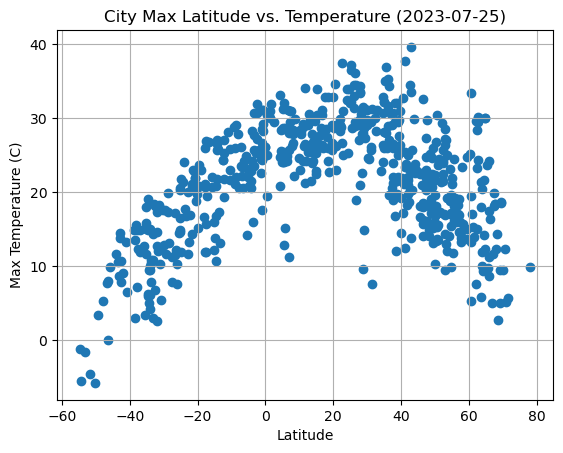

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o") 

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Temperature (2023-07-25)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

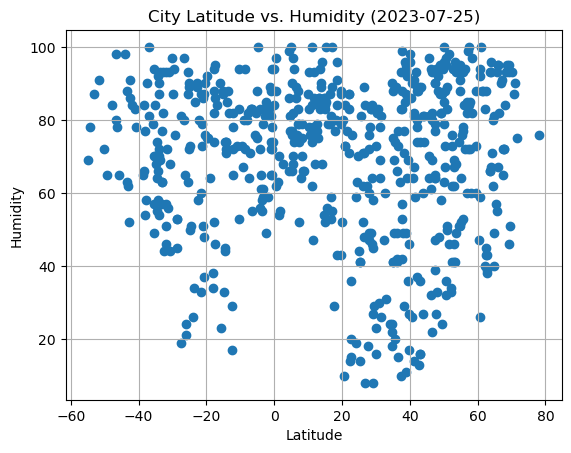

In [9]:
# Build scatter plot for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o") 

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity (2023-07-25)")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

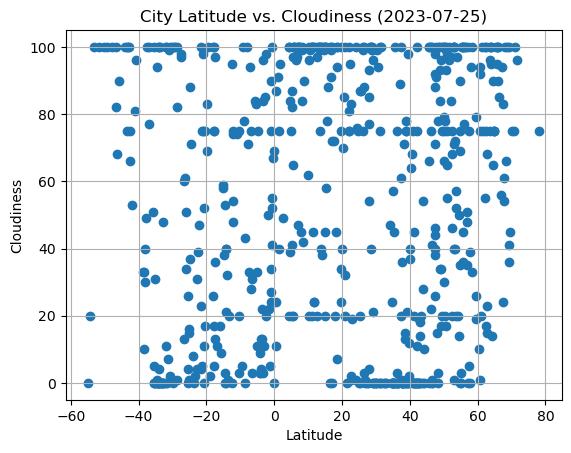

In [10]:
# Build scatter plot for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o") 

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness (2023-07-25)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

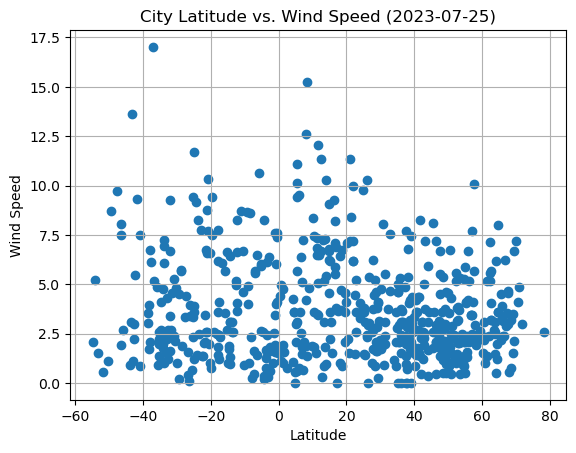

In [11]:
# Build scatter plot for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o") 

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Wind Speed (2023-07-25)")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Plot scatter plot
    plt.scatter(x_values,y_values)

    # Plot regression line
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")

    # Label plot
    plt.xlabel("Latitude")
    plt.ylabel(title)

    # Print r square value
    print(f"The r-value is: {rvalue**2}")

    # Show plot
    plt.show()
    

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]
northern_hemi_df.head()

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,selkirk,50.1436,-96.8845,22.26,85,79,3.52,CA,1690258577
2,sisimiut,66.9395,-53.6735,5.03,90,56,6.24,GL,1690258577
3,yellowknife,62.4560,-114.3525,23.29,43,75,5.14,CA,1690258481
4,kidal,18.4411,1.4078,32.83,43,100,3.68,ML,1690258578
6,vorgashor,67.5833,63.9500,19.87,65,83,2.96,RU,1690257986


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]
southern_hemi_df.head()

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,24.75,94,55,4.02,EC,1690257985
5,bengkulu,-3.8004,102.2655,28.20,65,13,1.68,ID,1690258000
7,port-aux-francais,-49.3500,70.2167,3.32,65,100,8.69,TF,1690258579
9,grytviken,-54.2811,-36.5092,-5.57,78,20,5.21,GS,1690258580
12,santana,-0.0583,-51.1817,26.10,94,0,1.54,BR,1690258582


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.3316902894647301


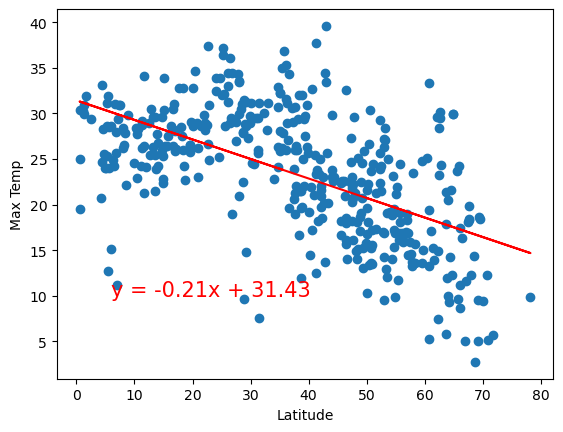

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Max Temp"].astype("float")
title = "Max Temp"
text_coordinates = (6,10)

# Plot
plot_linear_regression(x_values, y_values, title, text_coordinates)

The r-value is: 0.6808761504120692


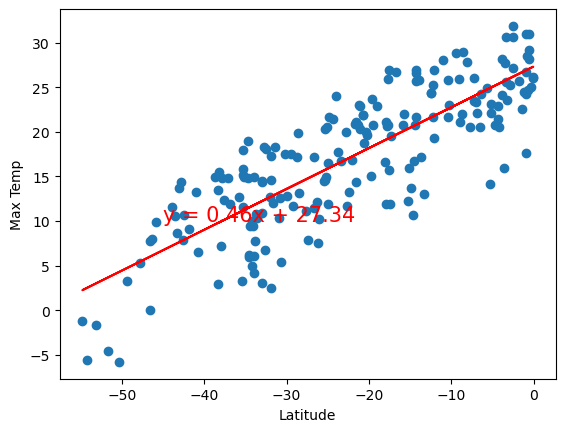

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Max Temp"].astype("float")

title = "Max Temp"
text_coordinates = (-45,10)

# Plot
plot_linear_regression(x_values, y_values, title, text_coordinates)

**Discussion about the linear relationship:**
There is a negative linear relationship between Latitude and Temperature in the Northern Hemisphere while there is a positive linear relationship in the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.00021830601497715627


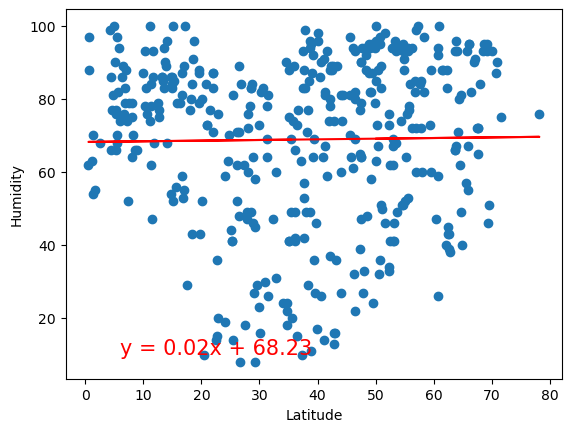

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Humidity"].astype("float")


title = "Humidity"
text_coordinates = (6,10)

# Plot
plot_linear_regression(x_values, y_values, title, text_coordinates)

The r-value is: 0.00030543068940965375


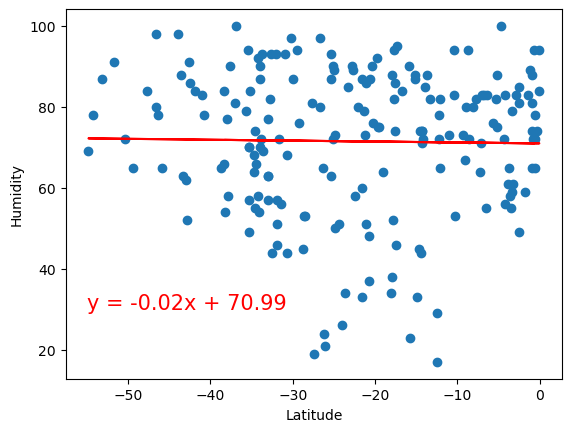

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Humidity"].astype("float")

title = "Humidity"
text_coordinates = (-55,30)

# Plot
plot_linear_regression(x_values, y_values, title, text_coordinates)

**Discussion about the linear relationship:**
There is a very weak or almost zero correlation between Latitude and Humidity in both hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.002090229947503721


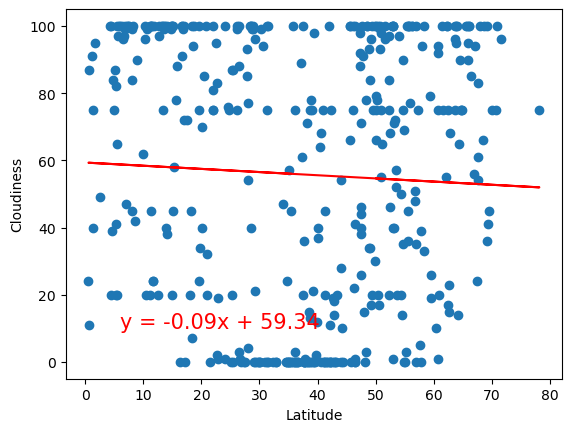

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Cloudiness"].astype("float")

title = "Cloudiness"
text_coordinates = (6,10)

# Plot
plot_linear_regression(x_values, y_values, title, text_coordinates)

The r-value is: 0.016485313337269023


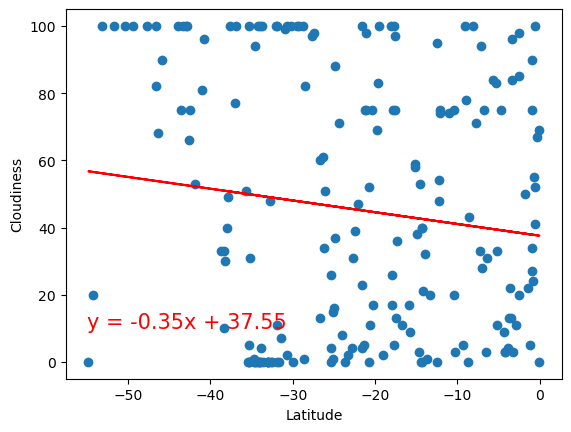

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Cloudiness"].astype("float")

title = "Cloudiness"
text_coordinates = (-55,10)

# Plot
plot_linear_regression(x_values, y_values, title, text_coordinates)

**Discussion about the linear relationship:** 
There is a weak negative correlation between Latitude and Cloudiness in both hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.05111727491873591


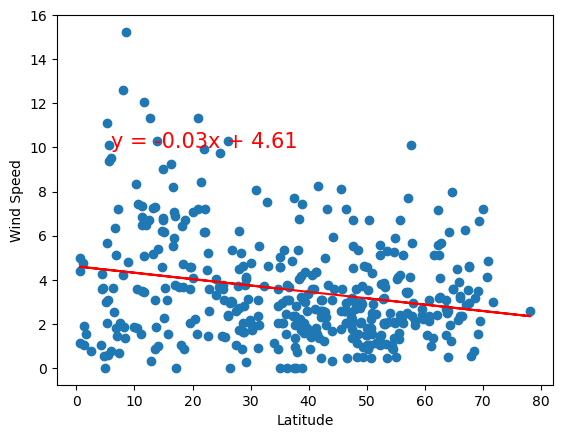

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Wind Speed"].astype("float")

title = "Wind Speed"
text_coordinates = (6,10)

# Plot
plot_linear_regression(x_values, y_values, title, text_coordinates)

The r-value is: 0.0026963102232813604


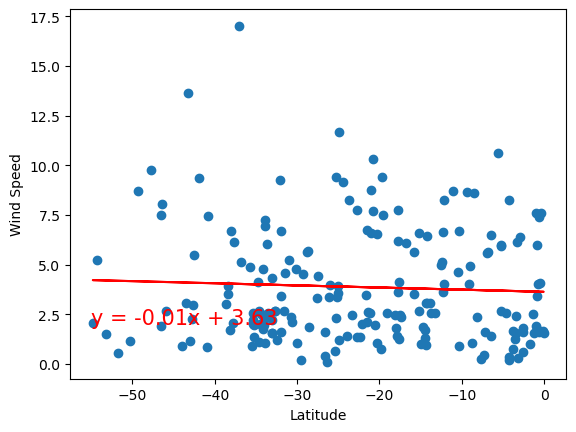

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Wind Speed"].astype("float")

title = "Wind Speed"
text_coordinates = (-55,2)

# Plot
plot_linear_regression(x_values, y_values, title, text_coordinates)

**Discussion about the linear relationship:** 
There is a weak correlation or almost zero correlation between Latitude and Wind Speed in both hemispheres.